In [22]:
from google.colab import files
uploaded = files.upload()

Saving heart_disease.csv to heart_disease.csv


In [73]:
import pandas as pd
data = pd.read_csv('heart_disease.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,fixed defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


2. Exploratory Data Analysis (EDA):

Perform exploratory data analysis to understand the structure of the dataset.

Check for missing values, outliers, and inconsistencies in the data.

Visualize the distribution of features, including histograms, box plots, and correlation matrices.

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


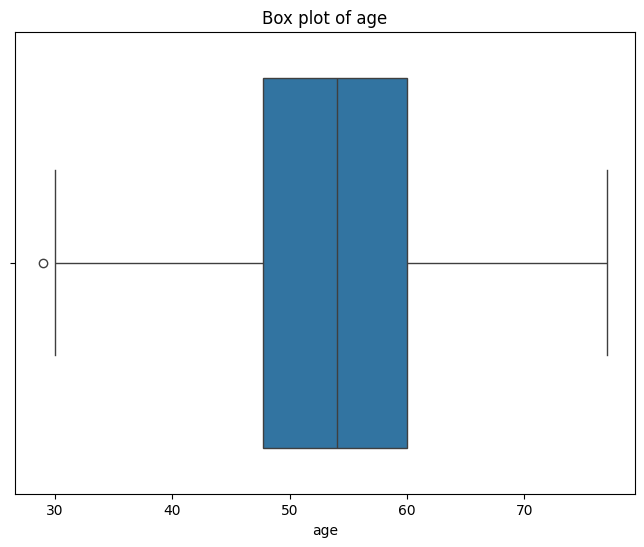

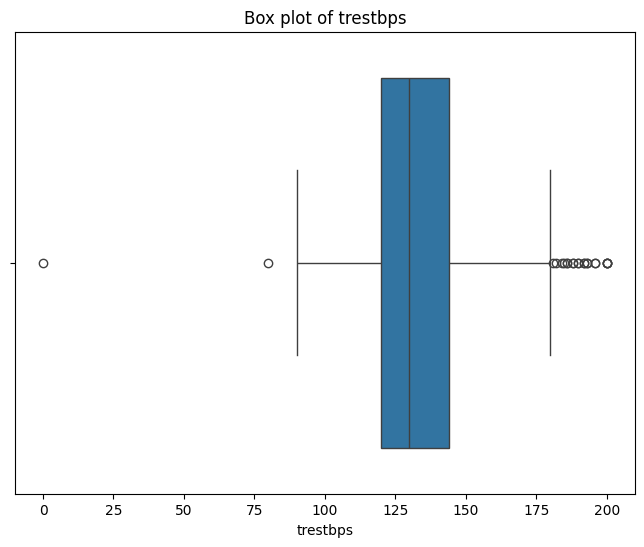

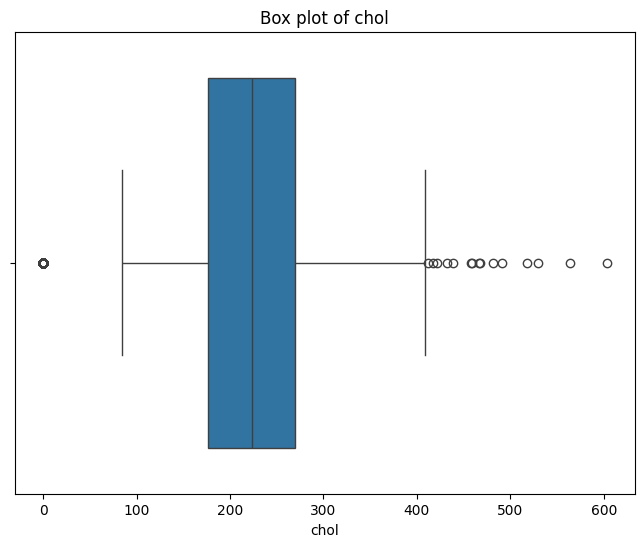

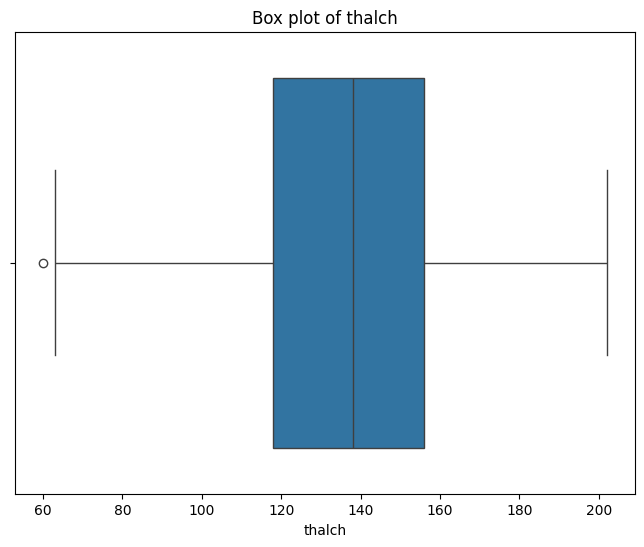

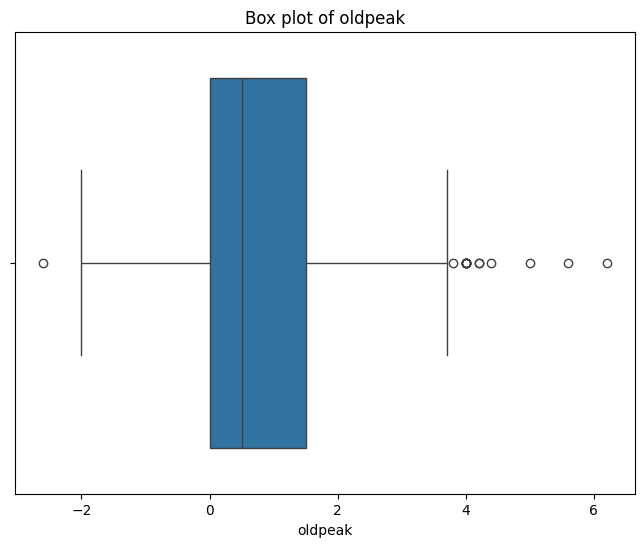

Unique values for sex: ['Male' 'Female']
Unique values for cp: ['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal']
Unique values for fbs: [ True False]
Unique values for restecg: ['lv hypertrophy' 'normal' 'st-t abnormality']
Unique values for exang: ['FALSE' 'TRUE' 'TURE']
Unique values for slope: ['downsloping' 'flat' 'upsloping']
Unique values for thal: ['fixed defect' 'normal' 'reversable defect']


In [30]:
# Check for missing values
print(data.isnull().sum())

# Check for outliers using box plots
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
for feature in numerical_features:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=data[feature])
  plt.title(f'Box plot of {feature}')
  plt.show()

# Check for inconsistencies in categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for feature in categorical_features:
  print(f'Unique values for {feature}: {data[feature].unique()}')

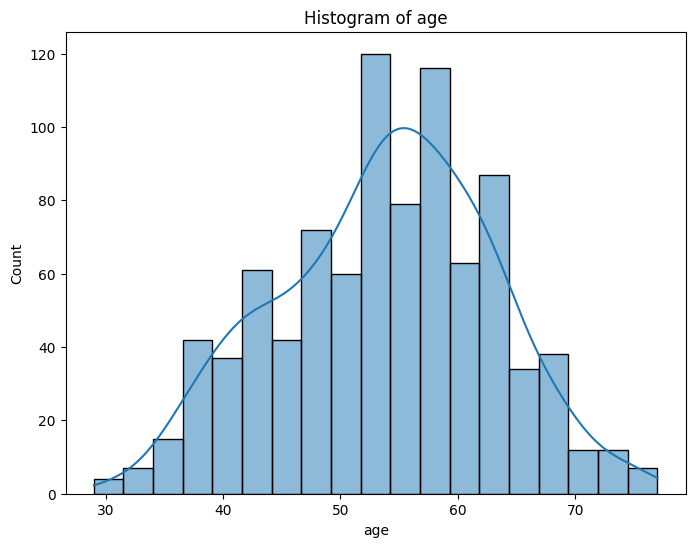

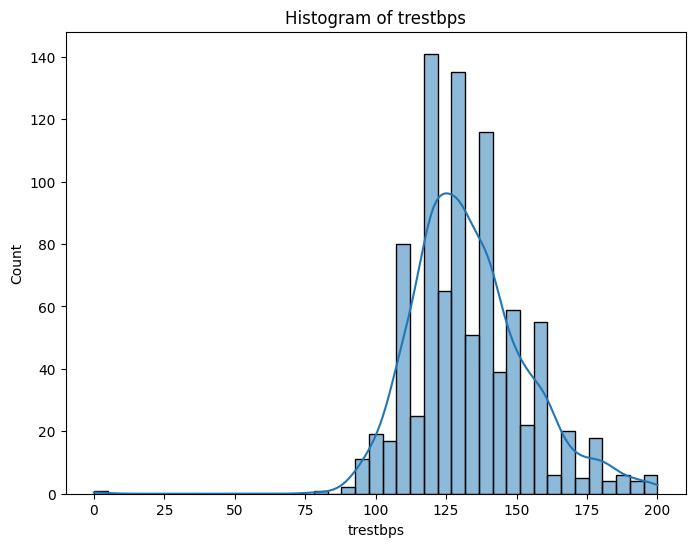

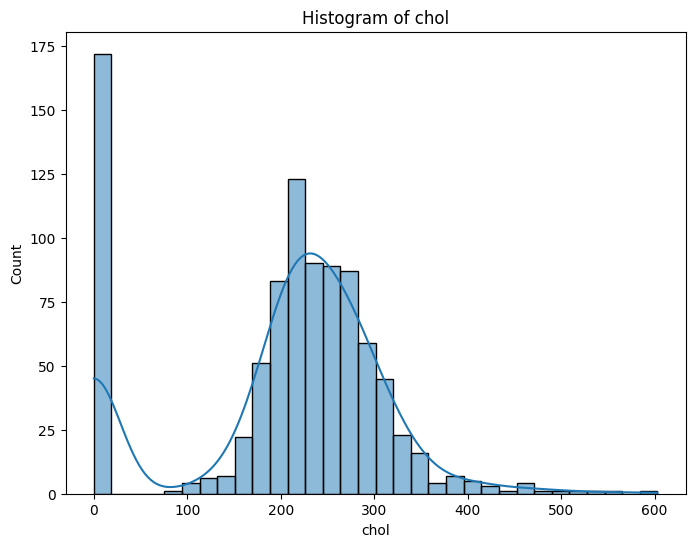

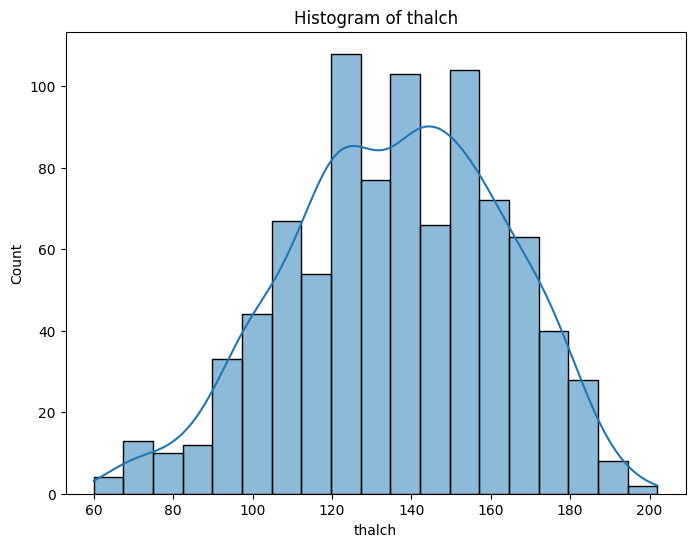

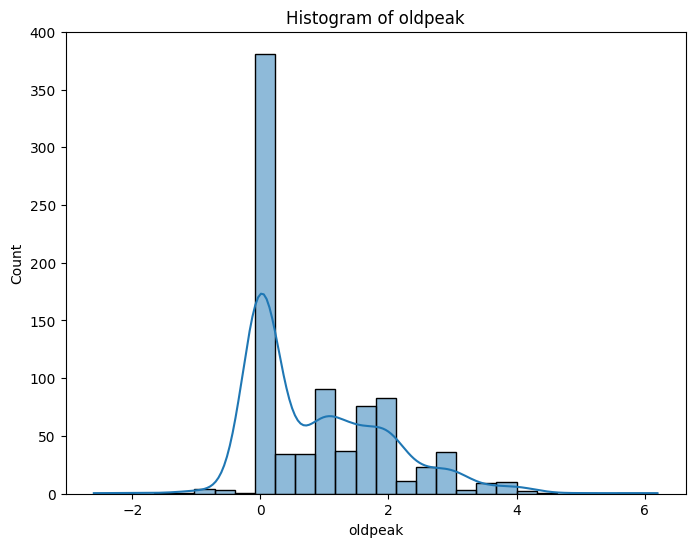

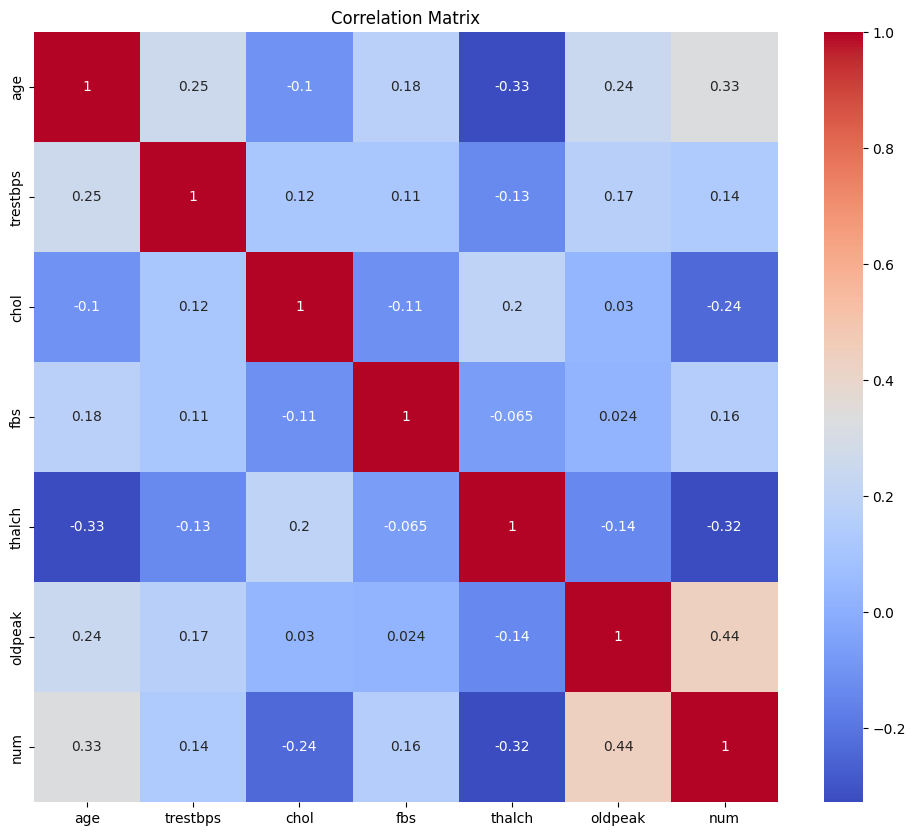

In [33]:
# Visualize the distribution of features using histograms
for feature in numerical_features:
  plt.figure(figsize=(8, 6))
  sns.histplot(data[feature], kde=True)
  plt.title(f'Histogram of {feature}')
  plt.show()

# Visualize the correlation matrix
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

3. Feature Engineering:

If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.


In [38]:
# Encoding categorical variables using one-hot encoding
data = pd.get_dummies(data, columns=['cp', 'restecg', 'slope', 'thal'], prefix=['cp', 'restecg', 'slope', 'thal'])

# Scaling numerical features using standardization
from sklearn.preprocessing import StandardScaler

numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])
data

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,num,cp_asymptomatic,...,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,1.006027,Male,0.567394,0.281297,True,0.524183,FALSE,1.288612,0,False,...,True,True,False,False,True,False,False,True,False,False
1,-1.397560,Male,0.076967,0.013526,False,-0.147705,FALSE,-0.815249,0,False,...,False,False,True,False,False,True,False,True,False,False
2,0.350503,Male,0.322181,-0.084656,False,0.449529,FALSE,-0.449360,0,True,...,False,False,True,False,False,True,False,True,False,False
3,-0.195767,Male,-0.756760,-0.138211,False,2.017268,FALSE,-0.815249,0,False,...,True,True,False,False,False,True,False,True,False,False
4,0.350503,Male,-1.149102,-0.004325,False,-0.371668,TRUE,0.556834,0,True,...,False,False,True,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,-0.086513,Male,-0.413461,-1.798388,False,-0.595631,FALSE,0.556834,4,True,...,False,False,True,False,False,False,True,True,False,False
904,0.896773,Male,1.597292,-0.281021,False,-0.595631,TRUE,1.928917,4,True,...,False,False,False,True,False,True,False,False,False,True
905,0.241249,Male,1.793463,-1.798388,False,-0.483649,TRUE,1.471556,4,False,...,False,True,False,False,True,False,False,False,True,False
906,0.241249,Male,0.518352,0.058155,True,-1.155538,TURE,NaN,4,False,...,False,False,False,True,True,False,False,True,False,False


4. Decision Tree Classification:

Split the dataset into training and testing sets (e.g., using an 80-20 split).

Implement a Decision Tree Classification model using a library like scikit-learn.

Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).


In [106]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, label_binarize

In [75]:
# 4. Decision Tree Classification:

# Split the dataset into training and testing sets
X = data.drop('chol', axis=1)
y = data['chol']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train
X_test
y_train
y_test



,chol
865,0
439,0
342,291
736,241
785,206
...,...
580,266
868,312
445,203
786,286


In [86]:
# Define categorical features to be label encoded (excluding 'cp', 'restecg', 'slope', 'thal')
categorical_features = ['sex','thalch','cp', 'fbs', 'restecg', 'exang', 'slope','thal']  # Example, adjust as needed

# Create a LabelEncoder for each categorical feature
label_encoders = {}
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    # Fit the encoder on the combined training and testing data
    all_data = pd.concat([X_train[feature], X_test[feature]])
    label_encoders[feature].fit(all_data)

    # Transform the training and testing data using the same encoder
    X_train[feature] = label_encoders[feature].transform(X_train[feature])
    X_test[feature] = label_encoders[feature].transform(X_test[feature])

In [91]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
# Changed 'binary' to 'micro' to handle multiclass classification
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.03296703296703297
Precision: 0.03296703296703297
Recall: 0.03296703296703297
F1-score: 0.03296703296703297


In [108]:
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Binarize the target variable for multi-class ROC AUC
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_bin = label_binarize(y_pred, classes=np.unique(y_test))

# Calculate ROC AUC using 'micro' averaging for multi-class
roc_auc = roc_auc_score(y_test_bin, y_pred_bin, average='micro', multi_class='ovr')

print("ROC-AUC:", roc_auc)

ROC-AUC: 0.5056999075690665


5. Hyperparameter Tuning:

Perform hyperparameter tuning to optimize the Decision Tree model.

Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.


In [92]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [93]:
# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score: 0.17077940481813889


In [94]:

# Use the best estimator to make predictions on the testing set
best_dt_classifier = grid_search.best_estimator_
y_pred = best_dt_classifier.predict(X_test)

# Evaluate the model's performance using the best estimator
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.08241758241758242
Precision: 0.08241758241758242
Recall: 0.08241758241758242
F1-score: 0.08241758241758242


6. Model Evaluation and Analysis:

Analyse the performance of the Decision Tree model using the evaluation metrics obtained.

Visualize the decision tree structure to understand the rules learned by the model and identify important features


In [99]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np


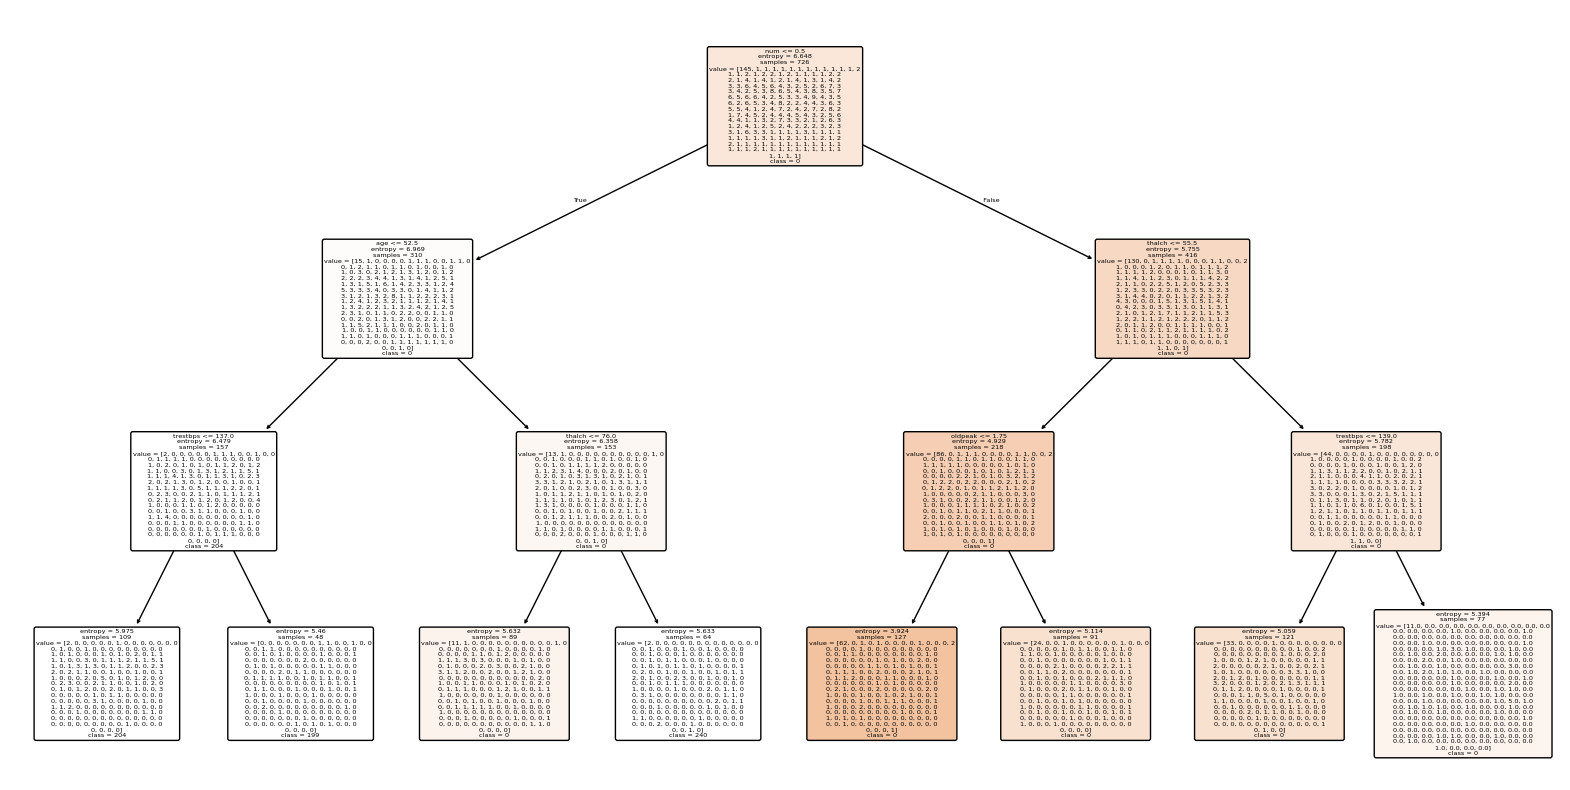

In [100]:
# Assuming you have already trained your best_dt_classifier and have X_train
plt.figure(figsize=(20, 10))
# Get unique class labels from the training target variable
class_names = [str(c) for c in np.unique(y_train)]
plot_tree(best_dt_classifier, feature_names=X_train.columns, class_names=class_names, filled=True, rounded=True)
plt.show()

In [101]:
# Further analysis:

# 1. Confusion Matrix:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
# You can further visualize this with a heatmap using seaborn

# 2. Feature Importance:
feature_importances = best_dt_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)
print("Feature Importance:\n", feature_importance_df)

Confusion Matrix:
 [[22  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]]
Feature Importance:
      feature  importance
6     thalch    0.269515
11       num    0.256371
3   trestbps    0.208870
0        age    0.160764
8    oldpeak    0.104479
1        sex    0.000000
2         cp    0.000000
4        fbs    0.000000
5    restecg    0.000000
7      exang    0.000000
9      slope    0.000000
10      thal    0.000000


In [ ]:
# 3. ROC Curve (if applicable):
# If problem is a binary classification, we can plot the ROC curve.
# from sklearn.metrics import roc_curve, auc
# fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# roc_auc = auc(fpr, tpr)
# plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend(loc="lower right")
# plt.show()

Interview Questions:

1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

2. What is the difference between the Label encoding and One-hot encoding?


In [ ]:
# 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

# Answer:
# Some common hyperparameters for decision tree models include:

# * max_depth: The maximum depth of the tree. A deeper tree can potentially capture more complex relationships in the data, but it also increases the risk of overfitting.
# * min_samples_split: The minimum number of samples required to split an internal node. A higher value can prevent the tree from splitting on very small subsets of data, which can help to reduce overfitting.
# * min_samples_leaf: The minimum number of samples required to be at a leaf node. A higher value can prevent the tree from creating very small leaf nodes, which can also help to reduce overfitting.
# * criterion: The function used to measure the quality of a split. Common options are 'gini' (Gini impurity) and 'entropy' (information gain).
# * max_features: The number of features to consider when looking for the best split.
# * splitter: The strategy used to choose the split at each node. Options are 'best' and 'random'.

# The choice of these hyperparameters can significantly impact the model's performance. For example, increasing the max_depth can improve accuracy, but it can also increase the risk of overfitting. Decreasing min_samples_split can increase the complexity of the tree, but it can also make it more prone to overfitting.

In [111]:
# 2. What is the difference between Label encoding and One-hot encoding?

# Answer:
# Label encoding and one-hot encoding are techniques used to convert categorical data into numerical data, which is often required for machine learning algorithms.

# * Label encoding: Assigns a unique integer to each category in a feature. This approach can be useful when the categories have an inherent order (e.g., low, medium, high). However, it can introduce unintended relationships between categories if the order is not relevant. For example, if you have a feature "color" with categories "red", "green", and "blue", label encoding might assign "red" to 1, "green" to 2, and "blue" to 3. This could suggest that "green" is greater than "red" or "blue" is greater than "green", which may not be the case.
# * One-hot encoding: Creates a new binary feature for each category in a feature. Each new feature represents whether a data point belongs to a particular category or not. This approach avoids introducing unintended relationships between categories and can be useful when the categories do not have a natural order. For example, for the "color" feature with categories "red", "green", and "blue", one-hot encoding would create three new features: "color_red", "color_green", and "color_blue". For a data point with the color "red", the "color_red" feature would be 1, and the "color_green" and "color_blue" features would be 0.

# In general, one-hot encoding is a preferred method for categorical features in most machine learning applications, as it avoids introducing unintended relationships between categories and preserves the independence of features.